In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from copy import copy
import os

# Atoms Object

https://wiki.fysik.dtu.dk/ase/ase/atoms.html#module-ase.atoms

In [2]:
from ase import Atoms, Atom
from ase.visualize import ngl
d = 1.1
co = Atoms('CO', positions=[(0, 0, 0), (0, 0, d)])
ngl.view_ngl(co, w=500, h=500)

## Positions

In [3]:
co.positions

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

In [4]:
co.get_positions()

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

In [5]:
co.set_positions

<bound method Atoms.set_positions of Atoms(symbols='CO', pbc=False)>

In [6]:
co.positions[1, 2] = 1
co.positions

array([[0., 0., 0.],
       [0., 0., 1.]])

In [7]:
co.set_positions(np.array([[   0.,    0.,    0.],
                           [   0.,    0., 7.]]))
co.positions

array([[0., 0., 0.],
       [0., 0., 7.]])

## Calculator

In [8]:
from ase.calculators.emt import EMT
co.calc = EMT()

In [9]:
#co.get_potential_energy()

In [10]:
co.get_forces()

array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
for d in np.arange(0.5, 1.8, 0.1):
    co.positions[1, 2] = d
    print(f'{d:.1f}, {co.get_potential_energy():.3f}')

0.5, 10.566
0.6, 6.432
0.7, 3.717
0.8, 2.040
0.9, 1.113
1.0, 0.720
1.1, 0.697
1.2, 0.923
1.3, 1.309
1.4, 1.789
1.5, 2.317
1.6, 2.859
1.7, 3.394


In [12]:
x, y = [], [] 
for d in np.arange(0.5, 1.5, 0.001):
    co.positions[1, 2] = d
    x.append(d)
    y.append(co.get_potential_energy())

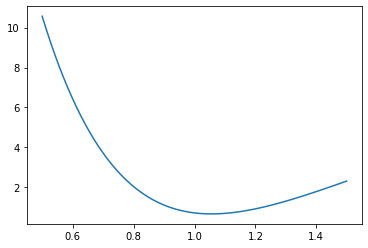

In [13]:
plt.plot(x, y)

In [14]:
co.positions[1, 2] = 1.05597
co.get_forces()

array([[ 0.00000000e+00,  0.00000000e+00, -1.19232346e-06],
       [ 0.00000000e+00,  0.00000000e+00,  1.19232346e-06]])

# Atoms Manipulation

## Crystal Structure

In [15]:
a = 3.519
atoms = Atoms([Atom('Ni', (0, 0, 0)), 
               Atom('Ni', (0, a/2, a/2)),
               Atom('Ni', (a/2, 0, a/2)),
               Atom('Ni', (a/2, a/2, 0))])
ngl.view_ngl(atoms, w=300, h=300)

In [16]:
b = 10
atoms.set_positions([(0, 0, 0), 
                     (0, b, b), 
                     (b, 0, b), 
                     (b, b, 0)])
ngl.view_ngl(atoms, w=300, h=300)

In [17]:
atoms.set_positions([(0, 0, 0), 
                     (0, a/2, a/2), 
                     (a/2, 0, a/2), 
                     (a/2, a/2, 0)])

In [18]:
atoms.cell

Cell([0.0, 0.0, 0.0])

In [19]:
atoms.set_cell([a, a, a])

In [20]:
atoms.cell[:]

array([[3.519, 0.   , 0.   ],
       [0.   , 3.519, 0.   ],
       [0.   , 0.   , 3.519]])

In [21]:
atoms.set_pbc(True)

In [22]:
ngl.view_ngl(atoms, w=300, h=300)

In [23]:
ngl.view_ngl(atoms*2, w=300, h=300)

In [24]:
ngl.view_ngl(atoms*[1, 2, 4], w=300, h=300)

In [25]:
atoms.calc = EMT()
atoms.get_potential_energy()

-0.03608712213194565

In [26]:
a = 3.519
atoms = Atoms([Atom('Ni', (0, 0, 0))])
atoms.set_cell([[a/2, a/2, 0], 
                [0, a/2, a/2],
                [a/2, 0, a/2]])
atoms.set_pbc(True)
atoms.calc = EMT()
atoms.get_potential_energy()

-0.009021780532993517

In [27]:
ngl.view_ngl(atoms, w=300, h=300)

In [28]:
atoms.cell
atoms.cell[:]

array([[1.7595, 1.7595, 0.    ],
       [0.    , 1.7595, 1.7595],
       [1.7595, 0.    , 1.7595]])

## Super Cell

In [29]:
a = 5.4307
atoms = Atoms([Atom('Si', (0, 0, 0)), 
               Atom('Si', (0, a/2, a/2)),
               Atom('Si', (a/2, 0, a/2)),
               Atom('Si', (a/2, a/2, 0))])
ngl.view_ngl(atoms, w=300, h=300)

In [30]:
supercell = atoms + atoms
print(supercell)

Atoms(symbols='Si8', pbc=False)


In [31]:
supercell.positions

array([[0.     , 0.     , 0.     ],
       [0.     , 2.71535, 2.71535],
       [2.71535, 0.     , 2.71535],
       [2.71535, 2.71535, 0.     ],
       [0.     , 0.     , 0.     ],
       [0.     , 2.71535, 2.71535],
       [2.71535, 0.     , 2.71535],
       [2.71535, 2.71535, 0.     ]])

In [32]:
translate_atoms = atoms.copy()
translate_atoms.translate([0.25*a, 0.25*a, 0.25*a])

In [33]:
supercell = atoms + translate_atoms
supercell.set_cell([a, a, a])
supercell.set_pbc(True)

In [34]:
ngl.view_ngl(supercell, w=300, h=300)

## Organic

In [35]:
from ase.io import read, write
molecule = read('ethylbenzene.xyz')
ngl.view_ngl(molecule, w=400, h=400)

In [36]:
molecule_pop = molecule.copy()
molecule_pop.pop(1)
ngl.view_ngl(molecule_pop, w=300, h=300) # 1 2 3 5 6 7 10 11 15 16 17

In [37]:
tags = np.zeros(len(molecule))
tags[np.array([1,2,3,5,6,7,10,11,15,16,17])] = 1
molecule.set_tags(tags)
molecule.get_tags()

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [38]:
molecule[molecule.get_tags() == 1]

Atoms(symbols='C6H5', pbc=False, initial_charges=..., tags=...)

In [39]:
ngl.view_ngl(molecule[molecule.get_tags() == 1], w=400, h=400)

In [40]:
molecule.positions -= molecule.positions[1]

In [41]:
molecule.positions[1]

array([0., 0., 0.])

In [42]:
molecule.positions[7]

array([-2.742e+00, -2.000e-04, -5.144e-01])

In [43]:
from numpy import pi ,sin, cos

def R(theta, u):
    return np.array([[cos(theta) + u[0]**2 * (1-cos(theta)), 
             u[0] * u[1] * (1-cos(theta)) - u[2] * sin(theta), 
             u[0] * u[2] * (1 - cos(theta)) + u[1] * sin(theta)],
            [u[0] * u[1] * (1-cos(theta)) + u[2] * sin(theta),
             cos(theta) + u[1]**2 * (1-cos(theta)),
             u[1] * u[2] * (1 - cos(theta)) - u[0] * sin(theta)],
            [u[0] * u[2] * (1-cos(theta)) - u[1] * sin(theta),
             u[1] * u[2] * (1-cos(theta)) + u[0] * sin(theta),
             cos(theta) + u[2]**2 * (1-cos(theta))]])

u = molecule.positions[7]/np.linalg.norm(molecule.positions[7])

In [44]:
ngl.view_ngl(molecule, w=500, h=500)

In [45]:
molecule_rot = molecule.copy()
positions = molecule_rot.positions
positions[molecule_rot.get_tags()==1] = R(np.pi/2, u).dot(positions[molecule_rot.get_tags()==1].T).T
molecule_rot.set_positions(positions)

In [46]:
ngl.view_ngl(molecule_rot, w=500, h=500)

In [47]:
mols = []
x, y = [], []
for alpha in np.linspace(0, pi, 100):
    molecule_rot = molecule.copy()
    positions = molecule_rot.positions
    positions[molecule_rot.get_tags()==1] = R(alpha, u).dot(positions[molecule_rot.get_tags()==1].T).T
    molecule_rot.set_positions(positions)
    mols.append(molecule_rot)
    x.append(alpha)
    molecule_rot.calc = EMT()
    y.append(molecule_rot.get_potential_energy())
ngl.view_ngl(mols, w=300, h=300)

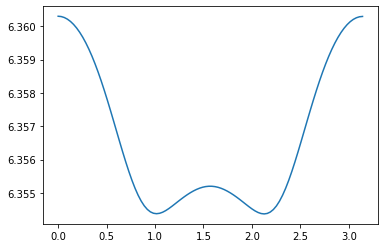

In [48]:
plt.plot(x, y)

# VASP Calculator 

In [49]:
d = 1.1
co = Atoms('CO', positions=[(0, 0, 0), (0, 0, d)])
ngl.view_ngl(co, w=500, h=500)

In [50]:
from ase.calculators.vasp import Vasp
calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
           kpts=(1, 1, 1),
           encut=100,
#          isym=0,
#          icharg=1,
#          ivdw=21,
           setups={'C': '', 'O': ''},
#          setups={'base': 'GW', 'Br': ''},
            directory='VASP',
           xc='PBE')
co.calc = calc

In [51]:
potcar_list = ['C', 'O']
for pot in potcar_list:
    pp_source_dir = '/home/lkgroup/potentials/VASP/PBE/'
    with open(pp_source_dir + pot + '/POTCAR', 'r') as f:
        potcar = f.read()
    try:
        os.makedirs(f'/home/oz/sync/vasp_pp/potpaw_PBE/{pot}/')
    except FileExistsError:
        pass
    with open(f'/home/oz/sync/vasp_pp/potpaw_PBE/{pot}/POTCAR', 'w') as f:
        f.write(potcar)

In [52]:
# co.get_potential_energy()

In [53]:
co.set_cell([10, 10, 10])
co.set_pbc(True)

In [54]:
co.get_potential_energy()

-17.21650531

In [55]:
!cat VASP/OSZICAR

       N       E                     dE             d eps       ncg     rms          rms(c)
DAV:   1    -0.422205459931E+03   -0.42221E+03   -0.18990E+04   144   0.176E+02    0.416E+01
DAV:   2    -0.303361787853E+03    0.11884E+03   -0.28787E+02    72   0.474E+01    0.375E+01
DAV:   3    -0.787168282249E+02    0.22464E+03   -0.12754E+02    72   0.203E+01    0.210E+01
DAV:   4    -0.550754644946E+02    0.23641E+02   -0.48443E+01    72   0.110E+01    0.284E+01
DAV:   5    -0.862376322920E+02   -0.31162E+02   -0.30825E+02    72   0.364E+01    0.301E+01
DAV:   6    -0.287505063229E+02    0.57487E+02   -0.32254E+01   108   0.963E+00    0.154E+01
DAV:   7    -0.229106895821E+02    0.58398E+01   -0.10121E+02    72   0.148E+01    0.109E+01
DAV:   8    -0.175836850539E+02    0.53270E+01   -0.19368E+01    72   0.740E+00    0.432E+00
DAV:   9    -0.177335514017E+02   -0.14987E+00   -0.78765E+00    72   0.495E+00    0.511E+00
DAV:  10    -0.171823882319E+02    0.55116E+00   -0.37637E+00    72   0

In [56]:
x, y = [], [] 
for d in tqdm(np.linspace(1, 1.5, 10)):
    co.positions[1, 2] = d
    x.append(d)
    y.append(co.get_potential_energy())

  0%|          | 0/10 [00:00<?, ?it/s]

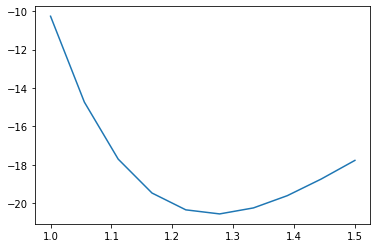

In [57]:
plt.plot(x,y)

In [58]:
co.positions[1, 2] = 1.27016
co.get_forces()

array([[-0.        , -0.        ,  0.20860479],
       [ 0.        ,  0.        , -0.20860479]])

In [59]:
a = 5.4307
atoms = Atoms([Atom('Si', (0, 0, 0)), 
               Atom('Si', (0, a/2, a/2)),
               Atom('Si', (a/2, 0, a/2)),
               Atom('Si', (a/2, a/2, 0))])
translate_atoms = atoms.copy()
translate_atoms.translate([0.25*a, 0.25*a, 0.25*a])
supercell = atoms + translate_atoms
supercell.set_cell([a, a, a])
supercell.set_pbc(True)
calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
           kpts=(10, 10, 10),
           encut=300,
           isym=2,
           icharg=2,
            directory='VASP',
           xc='PBE')
supercell.calc = calc
positions0 = copy(supercell.positions)
cell0 = copy(supercell.cell)

In [60]:
x, y = [], []
for vol in tqdm(np.linspace(100, 220, 10)):
    scale = np.cbrt(vol)/a
    supercell.set_positions(positions0*scale)
    supercell.set_cell([a*scale, a*scale, a*scale])
#     print(a, scale, supercell.cell)
    x.append(supercell.get_volume())
    y.append(supercell.get_potential_energy())
    

  0%|          | 0/10 [00:00<?, ?it/s]

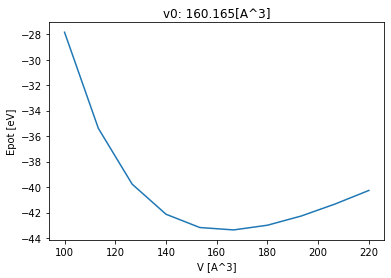

In [61]:
plt.plot(x,y)
plt.ylabel('Epot [eV]')
plt.xlabel('V [A^3]')
plt.title(f'v0: {a**3:.3f}[A^3]')
plt.show()

# Minimization

In [62]:
from ase.optimize import BFGS
d = 0.9575
t = np.pi / 180 * (104.51 - 30)
water = Atoms('H2O',
              positions=[(d, 0, 0),
                         (d * np.cos(t), d * np.sin(t), 0),
                         (0, 0, 0)],
              calculator=EMT())
dyn = BFGS(water, trajectory='H2O.traj') # Broyden–Fletcher–Goldfarb–Shanno algorithm
dyn.run(fmax=0.005)

      Step     Time          Energy         fmax
BFGS:    0 13:47:33        3.047481       11.9122
BFGS:    1 13:47:33        2.242248        4.3641
BFGS:    2 13:47:33        1.981241        2.0594
BFGS:    3 13:47:33        1.932755        0.7105
BFGS:    4 13:47:33        1.923799        0.3039
BFGS:    5 13:47:33        1.919769        0.2571
BFGS:    6 13:47:33        1.896225        0.4407
BFGS:    7 13:47:34        1.886843        0.3341
BFGS:    8 13:47:34        1.881613        0.1800
BFGS:    9 13:47:34        1.879760        0.0884
BFGS:   10 13:47:34        1.879108        0.0457
BFGS:   11 13:47:34        1.878924        0.0223
BFGS:   12 13:47:34        1.878887        0.0066
BFGS:   13 13:47:34        1.878884        0.0011


True

In [63]:
from ase.io import Trajectory
traj = Trajectory('H2O.traj')
ngl.view_ngl(traj, w=500, h=500)

In [64]:
molecule = read('ethylbenzene.xyz')
molecule.calc = EMT()
dyn = BFGS(molecule, trajectory='ethylbenzene.traj') # Broyden–Fletcher–Goldfarb–Shanno algorithm
dyn.run(fmax=0.05)

      Step     Time          Energy         fmax
BFGS:    0 13:47:34        6.360300        4.4983
BFGS:    1 13:47:34        4.426493        2.8633
BFGS:    2 13:47:34        3.940982        2.0518
BFGS:    3 13:47:34        3.706366        1.1021
BFGS:    4 13:47:34        3.566493        1.0248
BFGS:    5 13:47:34        3.425396        1.1240
BFGS:    6 13:47:34        3.273492        0.6961
BFGS:    7 13:47:34        3.254325        0.5460
BFGS:    8 13:47:34        3.219537        0.3891
BFGS:    9 13:47:34        3.210391        0.3056
BFGS:   10 13:47:34        3.196879        0.2115
BFGS:   11 13:47:34        3.194637        0.2089
BFGS:   12 13:47:34        3.190109        0.1859
BFGS:   13 13:47:34        3.185086        0.1895
BFGS:   14 13:47:34        3.179342        0.1916
BFGS:   15 13:47:34        3.176479        0.1532
BFGS:   16 13:47:34        3.174404        0.1078
BFGS:   17 13:47:34        3.173032        0.0949
BFGS:   18 13:47:34        3.171277        0.1121
B

True

In [65]:
traj = Trajectory('ethylbenzene.traj')
ngl.view_ngl(traj, w=500, h=500)

In [67]:
molecule =read('ethylbenzene.xyz') # Ethylbenzene
molecule.calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
           kpts=(1, 1, 1),
           encut=100,
           setups={'C': '', 'H': ''},
                     directory='VASP',
           xc='PBE')
molecule.set_cell([20, 20, 20])
molecule.set_pbc(True)
dyn = BFGS(molecule, trajectory='ethylbenzene_VASP.traj') # Broyden–Fletcher–Goldfarb–Shanno algorithm
dyn.run(fmax=0.05)

      Step     Time          Energy         fmax
BFGS:    0 13:51:31     -119.219245        2.8698
BFGS:    1 13:51:36     -119.689573        3.2396
BFGS:    2 13:51:40     -120.029791        2.2420
BFGS:    3 13:51:45     -120.180980        1.3450
BFGS:    4 13:51:48     -120.209278        0.8688
BFGS:    5 13:51:52     -120.225113        0.2852
BFGS:    6 13:51:56     -120.233878        0.2932
BFGS:    7 13:52:00     -120.247147        0.2810
BFGS:    8 13:52:04     -120.251887        0.1587
BFGS:    9 13:52:07     -120.256160        0.1146
BFGS:   10 13:52:11     -120.258714        0.1290
BFGS:   11 13:52:14     -120.260548        0.1476
BFGS:   12 13:52:18     -120.261951        0.0807
BFGS:   13 13:52:21     -120.262755        0.0635
BFGS:   14 13:52:25     -120.263345        0.0604
BFGS:   15 13:52:28     -120.263904        0.0898
BFGS:   16 13:52:32     -120.264303        0.0669
BFGS:   17 13:52:35     -120.264644        0.0391


True

In [68]:
traj = Trajectory('ethylbenzene_VASP.traj')
ngl.view_ngl(traj, w=500, h=500)

# Band Structure

In [69]:
a = 5.4307
atoms = Atoms([Atom('Si', (0, 0, 0))])
translate_atoms = atoms.copy()
translate_atoms.translate([0.25*a, 0.25*a, 0.25*a])
supercell = atoms + translate_atoms
supercell.set_cell([[a/2, a/2, 0], 
                    [0, a/2, a/2],
                    [a/2, 0, a/2]])
supercell.set_pbc(True)

In [72]:
!rm VASP/*

<AxesSubplot:ylabel='energies [eV]'>

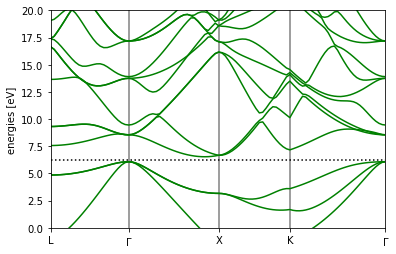

In [84]:
calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
           kpts={'path':'LGXKG', 'npoints': 100},
           encut=240,
           isym=2,
           icharg=2,
        lorbit=11,
            directory='',
           xc='PBE')
supercell.calc = calc
supercell.get_potential_energy()
bs = supercell.calc.band_structure()
bs.plot(emin=0, emax=20)

In [75]:
from ase.dft import bandgap
bandgap.bandgap(supercell.calc)

Gap: 0.456 eV
Transition (v -> c):
  (s=0, k=22, n=3, [0.00, 0.00, 0.00]) -> (s=0, k=44, n=4, [0.42, 0.00, 0.42])


(0.45640000000000036, (0, 22, 3), (0, 44, 4))

In [101]:

calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
           kpts=[21, 21, 21],
           encut=240,
           isym=2,
           icharg=2,
           lorbit=11,
            ismear = -5, #tetrahedron
           xc='PBE')
supercell.calc = calc
supercell.get_potential_energy()


-10.81973759

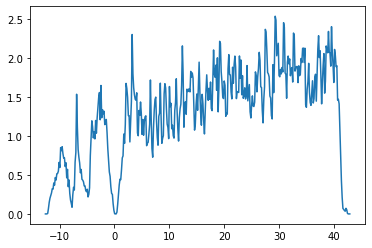

In [102]:
from ase.dft import dos
# supercell.calc.set(directory='')
dos = dos.DOS(supercell.calc)
d = dos.get_dos()
e = dos.get_energies()
plt.plot(e, d)

# MD

In [ ]:
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.langevin import Langevin
from ase import units

size = 3
# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol='Cu',
                          size=(size, size, size),
                          pbc=True)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, 300 * units.kB)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = Langevin(atoms, 5*units.fs, 300*units.kB, 0.002)  # 5 fs time step.


def printenergy(a=atoms):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


# Now run the dynamics
dyn.attach(printenergy, interval=10)
traj = Trajectory('Cu.traj', 'w', atoms)
dyn.attach(traj.write, interval=10)
# Now run the dynamics
dyn.run(200)

In [ ]:
traj = Trajectory('Cu.traj')
ngl.view_ngl(traj, w=500, h=500)

# NEB

In [103]:
from ase.build import fcc100, add_adsorbate
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.optimize import QuasiNewton

# 2x2-Al(001) surface with 3 layers and an
# Au atom adsorbed in a hollow site:
slab = fcc100('Al', size=(2, 2, 3))
add_adsorbate(slab, 'Au', 1.7, 'hollow')
slab.center(axis=2, vacuum=4.0)

# Make sure the structure is correct:
# view(slab)

# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
# print(mask)
slab.set_constraint(FixAtoms(mask=mask))

# Use EMT potential:
slab.calc = EMT()

# Initial state:
qn = QuasiNewton(slab, trajectory='initial.traj')
qn.run(fmax=0.05)

# Final state:
slab[-1].x += slab.get_cell()[0, 0] / 2
qn = QuasiNewton(slab, trajectory='final.traj')
qn.run(fmax=0.05)
ngl.view_ngl(slab*2, w=500, h=500)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:14:58        3.323870*       0.2462
BFGSLineSearch:    1[  1] 14:14:59        3.314754*       0.0378
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 14:14:59        3.320051*       0.1208
BFGSLineSearch:    1[  1] 14:14:59        3.316117*       0.0474


In [105]:
from ase.io import read
from ase.constraints import FixAtoms
from ase.calculators.emt import EMT
from ase.neb import NEB
from ase.optimize import BFGS

initial = read('initial.traj')
final = read('final.traj')

constraint = FixAtoms(mask=[atom.tag > 1 for atom in initial])

images = [initial]
for i in range(3):
    image = initial.copy()
    image.calc = EMT()
    image.set_constraint(constraint)
    images.append(image)

images.append(final)

neb = NEB(images)
neb.interpolate()
qn = BFGS(neb, trajectory='neb.traj')
qn.run(fmax=0.05)

      Step     Time          Energy         fmax
BFGS:    0 14:15:32        4.219952        3.5208
BFGS:    1 14:15:32        3.937039        2.1765
BFGS:    2 14:15:32        3.719814        0.4351
BFGS:    3 14:15:32        3.709652        0.2301
BFGS:    4 14:15:32        3.708879        0.2441
BFGS:    5 14:15:32        3.706088        0.2577
BFGS:    6 14:15:32        3.698532        0.2134
BFGS:    7 14:15:32        3.692121        0.2462
BFGS:    8 14:15:32        3.692274        0.1873
BFGS:    9 14:15:32        3.693484        0.1727
BFGS:   10 14:15:32        3.692659        0.1514
BFGS:   11 14:15:32        3.690809        0.0736
BFGS:   12 14:15:32        3.690202        0.0708
BFGS:   13 14:15:32        3.690382        0.0782
BFGS:   14 14:15:33        3.690426        0.1034
BFGS:   15 14:15:33        3.689890        0.0998
BFGS:   16 14:15:33        3.689029        0.0543
BFGS:   17 14:15:33        3.688737        0.0289


True

In [106]:
ngl.view_ngl(images, w=500, h=500)

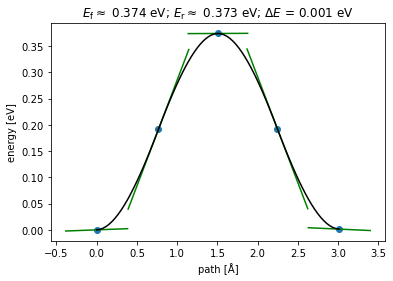

In [107]:
import matplotlib.pyplot as plt
from ase.neb import NEBTools
from ase.io import read

images = read('neb.traj@-5:')

nebtools = NEBTools(images)

# Get the calculated barrier and the energy change of the reaction.
Ef, dE = nebtools.get_barrier()

# Get the barrier without any interpolation between highest images.
Ef, dE = nebtools.get_barrier(fit=False)

# Get the actual maximum force at this point in the simulation.
max_force = nebtools.get_fmax()

# Create a figure like that coming from ASE-GUI.
fig = nebtools.plot_band()



# Two Stage Minimization

In [117]:
a = 4.212
mgo = Atoms([Atom('Mg', (0, 0, 0)), 
               Atom('O', (a/2, 0, 0))])
mgo.set_cell([[a/2, a/2, 0], 
                [0, a/2, a/2],
                [a/2, 0, a/2]])
mgo.set_pbc(True)
# ngl.view_ngl(mgo, w=300, h=300)

In [118]:
mgo_super = mgo*6

In [119]:
ngl.view_ngl(mgo_super, w=500, h=500)

In [121]:
i_remove = 257
print(mgo_super[i_remove])
mgo_super[i_remove].tag = 1
print('--------------------------------')
rc = a
for i, atom in enumerate(mgo_super):
    if np.linalg.norm(atom.position- mgo_super[i_remove].position) < rc:
        mgo_super[i].tag = 1
        print(mgo_super[i])
    else:
        mgo_super[i].tag = 0

Atom('O', [12.636, 12.636, 10.53], index=257)
--------------------------------
Atom('O', [10.53, 10.53, 10.53], tag=1, index=185)
Atom('Mg', [10.53, 10.53, 12.636], tag=1, index=186)
Atom('O', [12.636, 10.53, 12.636], tag=1, index=187)
Atom('O', [10.53, 12.636, 12.636], tag=1, index=197)
Atom('Mg', [10.53, 10.53, 8.424], tag=1, index=244)
Atom('O', [12.636, 10.53, 8.424], tag=1, index=245)
Atom('Mg', [12.636, 10.53, 10.53], tag=1, index=246)
Atom('O', [14.741999999999999, 10.53, 10.53], tag=1, index=247)
Atom('Mg', [14.741999999999999, 10.53, 12.636], tag=1, index=248)
Atom('O', [10.53, 12.636, 8.424], tag=1, index=255)
Atom('Mg', [10.53, 12.636, 10.53], tag=1, index=256)
Atom('O', [12.636, 12.636, 10.53], tag=1, index=257)
Atom('Mg', [12.636, 12.636, 12.636], tag=1, index=258)
Atom('O', [14.741999999999999, 12.636, 12.636], tag=1, index=259)
Atom('O', [10.53, 14.741999999999999, 10.53], tag=1, index=267)
Atom('Mg', [10.53, 14.741999999999999, 12.636], tag=1, index=268)
Atom('O', [12.6

In [122]:
ngl.view_ngl(mgo_super[mgo_super.get_tags() == 1], w=500, h=500)

In [124]:
mgo_super.pop(i_remove)

Atom('O', [12.636, 12.636, 10.53], tag=1)

In [125]:

ngl.view_ngl(mgo_super[mgo_super.get_tags() == 1], w=500, h=500)

In [126]:
from ase.lattice.cubic import FaceCenteredCubic
from ase import Atoms, Atom
from ase.calculators.kim.kim import KIM

# https://wiki.fysik.dtu.dk/ase/ase/atoms.html#module-ase.atoms

mgo_super.calc = KIM("LJ_ElliottAkerson_2015_Universal__MO_959249795837_003")
dyn = BFGS(mgo_super, trajectory='MgO_super.traj') # Broyden–Fletcher–Goldfarb–Shanno algorithm
dyn.run(fmax=0.005)

# energy = atoms.get_potential_energy()
# print("Potential energy: {} eV".format(energy))

      Step     Time          Energy         fmax
BFGS:    0 14:18:29    -1147.468505        0.3205
BFGS:    1 14:18:29    -1147.481150        0.2833
BFGS:    2 14:18:30    -1147.526943        0.2795
BFGS:    3 14:18:30    -1147.535442        0.2498
BFGS:    4 14:18:31    -1147.573674        0.2782
BFGS:    5 14:18:31    -1147.581446        0.2284
BFGS:    6 14:18:32    -1147.611617        0.2381
BFGS:    7 14:18:32    -1147.618569        0.2030
BFGS:    8 14:18:33    -1147.643599        0.1942
BFGS:    9 14:18:33    -1147.648440        0.1491
BFGS:   10 14:18:34    -1147.655070        0.0326
BFGS:   11 14:18:34    -1147.655396        0.0172
BFGS:   12 14:18:35    -1147.655652        0.0104
BFGS:   13 14:18:35    -1147.655707        0.0055
BFGS:   14 14:18:36    -1147.655739        0.0041


True

In [127]:
traj = Trajectory('MgO_super.traj')
traj_mod =[atoms[atoms.get_tags() == 1] for atoms in traj ]
ngl.view_ngl(traj_mod, w=500, h=500)

In [128]:
calc = Vasp(command=f'mpirun -n 36 vasp_std' ,
            kpts=(1, 1, 1),
            istart = 0, 
            icharg=2,
            encut = 600,
            ismear = 0, 
            sigma = 0.01,
            ncore = 1,
            nbands = 1920,
            prec = "Accurate",
            ediff = 1e-6,
            gga = "PS",
            ibrion = 2,
            nelmin = 4,
            potim = 0.5,
            isif = 0,
            ediffg = -0.01,
            nsw = 20,
           setups={'Mg': '', 'O': ''},
           xc='PBE')

potcar_list = ['Mg', 'O']
for pot in potcar_list:
    pp_source_dir = '/home/lkgroup/potentials/VASP/PBE/'
    with open(pp_source_dir + pot + '/POTCAR', 'r') as f:
        potcar = f.read()
    try:
        os.makedirs(f'/home/oz/sync/vasp_pp/potpaw_PBE/{pot}/')
    except FileExistsError:
        pass
    with open(f'/home/oz/sync/vasp_pp/potpaw_PBE/{pot}/POTCAR', 'w') as f:
        f.write(potcar)

In [ ]:
# from ase.io import write, read
# write('mgo.xyz', mgo_super)
# mgo_super_fix = read('mgo.xyz')
# len(mgo_super_fix)

In [129]:
mgo_super.calc = calc
mgo_super.get_potential_energy()

IndexError: index 216 is out of bounds for axis 0 with size 2